## 3 Language Identification with Naive Bayes

In [1]:
import numpy as np
import pandas as pd

### 3.2 3.3

In [2]:
# Get the log conditional probabilities for each language.
# The output is a dictionary.
def cond_prob_log(language, a = 0.5): # a is the additive smoothing parameter
    counts = dict()
    letters = [chr(97 + i) for i in range(26)] + [' ', '\n']
    for letter in letters:
        counts[letter] = 0

    for i in range(10):
        file_name = language + str(i)
        file_path = 'languageID/' + file_name + '.txt'
        fhand = open(file_path)
        for line in fhand:
            letters = list(line)
            for letter in letters:
                counts[letter] += 1

    del counts['\n'] # only count 26 letters and spaces

    n_sum = sum(counts.values())
    probs_log = dict()
    for letter in counts:
        probs_log[letter] = np.log(counts[letter] + a) - np.log(n_sum + len(counts) * a)

    return(probs_log)

In [3]:
# Get the conditional probabilities for each language.
# The output is a vector. 
# The probabilities are in alphabetical order, and the last one is for the space.
def cond_prob(language, a = 0.5):
    p_log = cond_prob_log(language, a)
    letters = [chr(97 + i) for i in range(26)] + [' ']
    p = [0 for _ in range(27)]
    for i in range(27):
        p[i] = np.exp(p_log[letters[i]])
    return(p)

In [4]:
data = {
    'English': cond_prob('e'), 
    'Japanese': cond_prob('j'), 
    'Spanish': cond_prob('s')
}

df = pd.DataFrame(data, index = [chr(97 + i) for i in range(26)] + ['space'])
print(df)

        English  Japanese   Spanish
a      0.060169  0.131766  0.104560
b      0.011135  0.010867  0.008233
c      0.021510  0.005486  0.037526
d      0.021973  0.017226  0.039746
e      0.105369  0.060205  0.113811
f      0.018933  0.003879  0.008603
g      0.017479  0.014012  0.007184
h      0.047216  0.031762  0.004533
i      0.055411  0.097033  0.049860
j      0.001421  0.002341  0.006629
k      0.003734  0.057409  0.000278
l      0.028977  0.001433  0.052943
m      0.020519  0.039799  0.025809
n      0.057922  0.056711  0.054177
o      0.064464  0.091163  0.072492
p      0.016752  0.000874  0.024267
q      0.000562  0.000105  0.007678
r      0.053825  0.042804  0.059295
s      0.066182  0.042175  0.065770
t      0.080126  0.056990  0.035614
u      0.026664  0.070617  0.033702
v      0.009285  0.000245  0.005889
w      0.015496  0.019742  0.000093
x      0.001156  0.000035  0.002498
y      0.013844  0.014151  0.007863
z      0.000628  0.007722  0.002683
space  0.179250  0.123449  0

### 3.4

In [5]:
counts = dict()
letters = [chr(97 + i) for i in range(26)] + [' ', '\n']
for letter in letters:
    counts[letter] = 0

file_path = 'languageID/e10.txt'
fhand = open(file_path)
for line in fhand:
    letters = list(line)
    for letter in letters:
        counts[letter] += 1

del counts['\n'] # only count 26 letters and spaces

counts_vec = [0 for _ in range(27)]
letters = [chr(97 + i) for i in range(26)] + [' ']
for i in range(27):
    counts_vec[i] = counts[letters[i]]

In [6]:
print(pd.DataFrame({'Count': counts_vec}, index = [chr(97 + i) for i in range(26)] + ['space']))

       Count
a        164
b         32
c         53
d         57
e        311
f         55
g         51
h        140
i        140
j          3
k          6
l         85
m         64
n        139
o        182
p         53
q          3
r        141
s        186
t        225
u         65
v         31
w         47
x          4
y         38
z          2
space    498


### 3.5

In [7]:
def p_hat_log(language):
    p_log = 0
    p_train_log = cond_prob_log(language)
    letters = [chr(97 + i) for i in range(26)] + [' ']
    for i in range(27):
        p_log += counts_vec[i] * p_train_log[letters[i]]
    return(p_log)

for lan in ['English', 'Japanese', 'Spanish']:
    print(lan + ':', p_hat_log(lan[0].lower()))

English: -7841.865447060635
Japanese: -8771.433079075032
Spanish: -8467.282044010557


### 3.7

In [8]:
confusion = {
    'English': [0 for _ in range(3)], 
    'Japanese': [0 for _ in range(3)], 
    'Spanish': [0 for _ in range(3)]
} # Keys are true labels.

data = {
    'English': cond_prob_log('e'), 
    'Japanese': cond_prob_log('j'), 
    'Spanish': cond_prob_log('s')
}

for language in ['English', 'Japanese', 'Spanish']: # true labels
    for i in range(10, 20):
        file_name = language[0].lower() + str(i)
        file_path = 'languageID/' + file_name + '.txt'

        counts = dict()
        letters = [chr(97 + i) for i in range(26)] + [' ', '\n']
        for letter in letters:
            counts[letter] = 0

        fhand = open(file_path)
        for line in fhand:
            letters = list(line)
            for letter in letters:
                counts[letter] += 1

        del counts['\n'] # only count 26 letters and spaces

        letters = [chr(97 + i) for i in range(26)] + [' ']

        p_log = [0 for _ in range(3)]
        index = 0
        for lan in ['English', 'Japanese', 'Spanish']: # predictions
            p_train_log = data[lan]
            letters = [chr(97 + i) for i in range(26)] + [' ']
            for letter in letters:
                p_log[index] += counts[letter] * p_train_log[letter]
            index += 1

        confusion[language][np.argmax(p_log)] += 1

In [9]:
print(pd.DataFrame(confusion, index = ['English', 'Japanese', 'Spanish']))

          English  Japanese  Spanish
English        10         0        0
Japanese        0        10        0
Spanish         0         0       10


## 4 Simpled Feed-Forward Network

### 4.2

The code cell below is my first attempt. However, no matter how I choose hyperparameters, it always gives me abnormally high error rates. I spend many hours debugging but I still fail to make it output reasonable results. Finally, I give up my first attempt and come up with another scheme to solve 4.2.

In [17]:
# import matplotlib.pyplot as plt
# import numpy as np
# import torch
# from torchvision import datasets, transforms

# # Define a data transformation to convert the images to tensors
# transform = transforms.Compose([transforms.ToTensor()])

# # Download and load the MNIST dataset
# train_dataset = datasets.MNIST(root = 'data', train = True, transform = transform, download = True)
# test_dataset = datasets.MNIST(root = 'data', train = False, transform = transform, download = True)

# # Create data loaders to iterate through the dataset
# batch_size = 64 # batch size
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size)

# # Neural network architecture
# input_size = 784  # 28x28
# hidden_size = 300
# output_size = 10

# # Initialize weights
# np.random.seed(1031)
# weights_input_hidden = np.random.rand(input_size, hidden_size) * 2 - 1
# weights_hidden_output = np.random.rand(hidden_size, output_size) * 2 - 1

# # Sigmoid and softmax
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def softmax(x):
#     e_x = np.exp(x - np.max(x))
#     return e_x / e_x.sum()

# # Hyperparameters
# learning_rate = 1e-5
# num_epochs = 30

# # Training loop
# train_errors = []
# test_errors = []

# for epoch in range(num_epochs):
#     train_loss = 0
#     correct = 0
#     total = 0

#     for images, labels in train_loader:
#         images = images.view(images.shape[0], -1).numpy()  # Flatten the images

#         # Forward propagation
#         hidden_input = np.dot(images, weights_input_hidden)
#         hidden_output = sigmoid(hidden_input)
#         output = np.dot(hidden_output, weights_hidden_output)
#         predicted = softmax(output)

#         # Backpropagation
#         d_output = predicted - np.eye(output_size)[labels]
#         d_hidden = np.dot(d_output, weights_hidden_output.T) * hidden_output * (1 - hidden_output)

#         # SGD to update weights and biases
#         weights_hidden_output -= learning_rate * np.dot(hidden_output.T, d_output) / batch_size
#         weights_input_hidden -= learning_rate * np.dot(images.T, d_hidden) / batch_size

#         # Calculate accuracy
#         predicted_labels = np.argmax(predicted, axis = 1)
#         correct += (predicted_labels == labels.numpy()).sum()
#         total += labels.size(0)

#     # Calculate training error for the epoch
#     train_errors.append(1 - correct / total)

#     # Test the model
#     test_loss = 0
#     correct = 0
#     total = 0

#     for images, labels in test_loader:
#         images = images.view(images.shape[0], -1).numpy()

#         # Forward propagation
#         hidden_input = np.dot(images, weights_input_hidden)
#         hidden_output = sigmoid(hidden_input)
#         output = np.dot(hidden_output, weights_hidden_output)
#         predicted = softmax(output)

#         # Calculate accuracy
#         predicted_labels = np.argmax(predicted, axis = 1)
#         correct += (predicted_labels == labels.numpy()).sum()
#         total += labels.size(0)

#     # Calculate test error for the epoch
#     test_errors.append(1 - correct / total)

#     # Print training and test error for the epoch
#     print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Error: {train_errors[-1]:.4f}, Test Error: {test_errors[-1]:.4f}")

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Data Preprocessing using scikit-learn
mnist = fetch_openml("mnist_784")
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

Epoch [1/50] - Train Error: 0.7679, Test Error: 0.7673
Epoch [2/50] - Train Error: 0.6766, Test Error: 0.6712
Epoch [3/50] - Train Error: 0.5964, Test Error: 0.5885
Epoch [4/50] - Train Error: 0.5338, Test Error: 0.5239
Epoch [5/50] - Train Error: 0.4855, Test Error: 0.4787
Epoch [6/50] - Train Error: 0.4464, Test Error: 0.4406
Epoch [7/50] - Train Error: 0.4138, Test Error: 0.4121
Epoch [8/50] - Train Error: 0.3893, Test Error: 0.3854
Epoch [9/50] - Train Error: 0.3684, Test Error: 0.3638
Epoch [10/50] - Train Error: 0.3508, Test Error: 0.3454
Epoch [11/50] - Train Error: 0.3345, Test Error: 0.3290
Epoch [12/50] - Train Error: 0.3202, Test Error: 0.3174
Epoch [13/50] - Train Error: 0.3080, Test Error: 0.3061
Epoch [14/50] - Train Error: 0.2977, Test Error: 0.2961
Epoch [15/50] - Train Error: 0.2883, Test Error: 0.2878
Epoch [16/50] - Train Error: 0.2791, Test Error: 0.2782
Epoch [17/50] - Train Error: 0.2709, Test Error: 0.2699
Epoch [18/50] - Train Error: 0.2645, Test Error: 0.2643
E

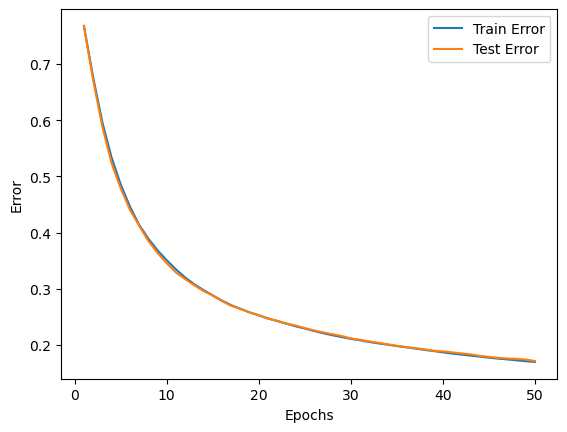

In [3]:
# Normalize the data to [0, 1]
X /= 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network Architecture
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = np.random.rand(input_size, hidden_size) * 2 - 1
        self.W2 = np.random.rand(hidden_size, output_size) * 2 - 1
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def forward(self, X):
        # Input to hidden layer
        self.z1 = np.dot(X, self.W1)
        self.a1 = self.sigmoid(self.z1)

        # Hidden layer to output
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.softmax(self.z2)

        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]

        # Calculate gradients
        dZ2 = self.a2 - np.eye(self.output_size)[y]
        dW2 = np.dot(self.a1.T, dZ2) / m
        dZ1 = np.dot(dZ2, self.W2.T) * self.a1 * (1 - self.a1)
        dW1 = np.dot(X.T, dZ1) / m
        
        # Update weights and biases
        self.W1 -= learning_rate * dW1
        self.W2 -= learning_rate * dW2

# Hyperparameters
input_size = 784
hidden_size = 300
output_size = 10
learning_rate = 0.005
num_epochs = 30
batch_size = 64

# Initialize the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Training loop
train_errors = []
test_errors = []

for epoch in range(num_epochs):
    for i in range(0, X_train.shape[0], batch_size):
        # Mini-batch training
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        # Forward and backward pass
        y_pred = model.forward(X_batch)
        model.backward(X_batch, y_batch, learning_rate)

    # Calculate training error for the epoch
    train_pred = np.argmax(model.forward(X_train), axis=1)
    train_accuracy = np.mean(train_pred == y_train)
    train_error = 1 - train_accuracy
    train_errors.append(train_error)

    # Calculate test error for the epoch
    test_pred = np.argmax(model.forward(X_test), axis=1)
    test_accuracy = np.mean(test_pred == y_test)
    test_error = 1 - test_accuracy
    test_errors.append(test_error)

    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Error: {train_error:.4f}, Test Error: {test_error:.4f}")

# Plot the learning curve
plt.plot(range(1, num_epochs + 1), train_errors, label='Train Error')
plt.plot(range(1, num_epochs + 1), test_errors, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

### 4.3

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Epoch [1/50] - Train Error: 0.7632, Test Error: 0.6134
Epoch [2/50] - Train Error: 0.5223, Test Error: 0.4644
Epoch [3/50] - Train Error: 0.4028, Test Error: 0.3539
Epoch [4/50] - Train Error: 0.3410, Test Error: 0.3199
Epoch [5/50] - Train Error: 0.3053, Test Error: 0.2867
Epoch [6/50] - Train Error: 0.2795, Test Error: 0.2517
Epoch [7/50] - Train Error: 0.2544, Test Error: 0.2346
Epoch [8/50] - Train Error: 0.2369, Test Error: 0.2126
Epoch [9/50] - Train Error: 0.2181, Test Error: 0.2027
Epoch [10/50] - Train Error: 0.2053, Test Error: 0.1928
Epoch [11/50] - Train Error: 0.1941, Test Error: 0.1823
Epoch [12/50] - Train Error: 0.1855, Test Error: 0.1749
Epoch [13/50] - Train Error: 0.1772, Test Error: 0.1672
Epoch [14/50] - Train Error: 0.1708, Test Error: 0.1593
Epoch [15/50] - Train Error: 0.1656, Test Error: 0.1535
Epoch [16/50] - Train Error: 0.1603, Test Error: 0.1504
Epoch [17/50] - Train Error: 0.1561, Test Error: 0.1464
Epoch [18/50] - Train Error: 0.1525, Test Error: 0.1427
E

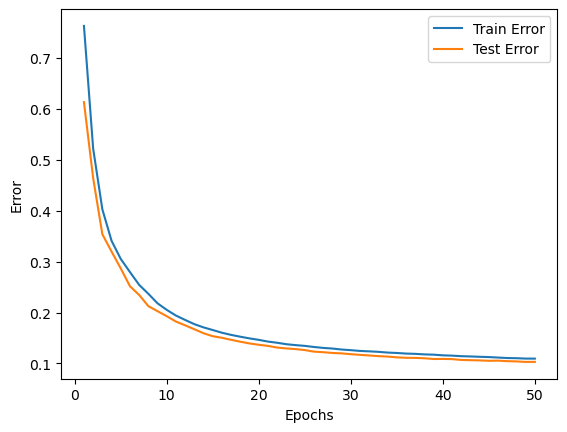

In [6]:
# Define a custom neural network class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 300, bias = False)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(300, 10, bias = False)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        return x

# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 50

# Load and preprocess MNIST data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Initialize the neural network and optimizer
model = NeuralNetwork()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop
train_errors = []
test_errors = []

for epoch in range(num_epochs):
    train_loss = 0
    correct_train = 0
    total_train = 0

    # Training
    model.train()
    for images, labels in train_loader:
        images = images.view(images.size(0), -1)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate training error
    train_error = 1 - correct_train / total_train
    train_errors.append(train_error)

    # Testing
    model.eval()
    test_loss = 0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Calculate testing accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    # Calculate test error
    test_error = 1 - correct_test / total_test
    test_errors.append(test_error)

    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Error: {train_error:.4f}, Test Error: {test_error:.4f}")

# Plot the learning curve
plt.plot(range(1, num_epochs + 1), train_errors, label='Train Error')
plt.plot(range(1, num_epochs + 1), test_errors, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

### 4.4

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [4]:
# Define a custom neural network class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 300, bias = False)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(300, 10, bias = False)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        return x

# Hyperparameters
batch_size = 64
learning_rate = 0.005
num_epochs = 15

# Load and preprocess MNIST data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = MNIST(root = 'data', train = True, transform = transform, download = True)
test_dataset = MNIST(root = 'data', train = False, transform = transform, download = True)

train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = batch_size)

# Initialize the neural network and optimizer
model = NeuralNetwork()
for layer in model.modules():
    if isinstance(layer, nn.Linear):
        layer.weight.data.uniform_(-1,1)
optimizer = optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop
train_errors_a = []
test_errors_a = []

for epoch in range(num_epochs):
    train_loss = 0
    correct_train = 0
    total_train = 0

    # Training
    model.train()
    for images, labels in train_loader:
        images = images.view(images.size(0), -1)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate training error
    train_error = 1 - correct_train / total_train
    train_errors_a.append(train_error)

    # Testing
    model.eval()
    test_loss = 0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Calculate testing accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    # Calculate test error
    test_error = 1 - correct_test / total_test
    test_errors_a.append(test_error)

    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Error: {train_error:.4f}, Test Error: {test_error:.4f}")

Epoch [1/15] - Train Error: 0.6581, Test Error: 0.5143
Epoch [2/15] - Train Error: 0.4309, Test Error: 0.3755
Epoch [3/15] - Train Error: 0.3376, Test Error: 0.3110
Epoch [4/15] - Train Error: 0.2883, Test Error: 0.2720
Epoch [5/15] - Train Error: 0.2581, Test Error: 0.2446
Epoch [6/15] - Train Error: 0.2353, Test Error: 0.2218
Epoch [7/15] - Train Error: 0.2172, Test Error: 0.2094
Epoch [8/15] - Train Error: 0.2047, Test Error: 0.1988
Epoch [9/15] - Train Error: 0.1937, Test Error: 0.1905
Epoch [10/15] - Train Error: 0.1850, Test Error: 0.1827
Epoch [11/15] - Train Error: 0.1782, Test Error: 0.1745
Epoch [12/15] - Train Error: 0.1716, Test Error: 0.1672
Epoch [13/15] - Train Error: 0.1660, Test Error: 0.1625
Epoch [14/15] - Train Error: 0.1605, Test Error: 0.1564
Epoch [15/15] - Train Error: 0.1562, Test Error: 0.1517


In [5]:
# Initialize the neural network and optimizer
model = NeuralNetwork()
for layer in model.modules():
    if isinstance(layer, nn.Linear):
        layer.weight.data.uniform_(-1,1)
optimizer = optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

# Training loop
train_errors_b = []
test_errors_b = []

for epoch in range(num_epochs):
    train_loss = 0
    correct_train = 0
    total_train = 0

    # Training
    model.train()
    for images, labels in train_loader:
        images = images.view(images.size(0), -1)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate training error
    train_error = 1 - correct_train / total_train
    train_errors_b.append(train_error)

    # Testing
    model.eval()
    test_loss = 0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Calculate testing accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    # Calculate test error
    test_error = 1 - correct_test / total_test
    test_errors_b.append(test_error)

    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Error: {train_error:.4f}, Test Error: {test_error:.4f}")

Epoch [1/15] - Train Error: 0.6354, Test Error: 0.4921
Epoch [2/15] - Train Error: 0.4221, Test Error: 0.3599
Epoch [3/15] - Train Error: 0.3319, Test Error: 0.2979
Epoch [4/15] - Train Error: 0.2845, Test Error: 0.2628
Epoch [5/15] - Train Error: 0.2535, Test Error: 0.2370
Epoch [6/15] - Train Error: 0.2319, Test Error: 0.2206
Epoch [7/15] - Train Error: 0.2154, Test Error: 0.2059
Epoch [8/15] - Train Error: 0.2023, Test Error: 0.1939
Epoch [9/15] - Train Error: 0.1914, Test Error: 0.1836
Epoch [10/15] - Train Error: 0.1827, Test Error: 0.1756
Epoch [11/15] - Train Error: 0.1758, Test Error: 0.1692
Epoch [12/15] - Train Error: 0.1691, Test Error: 0.1631
Epoch [13/15] - Train Error: 0.1633, Test Error: 0.1590
Epoch [14/15] - Train Error: 0.1572, Test Error: 0.1542
Epoch [15/15] - Train Error: 0.1536, Test Error: 0.1501


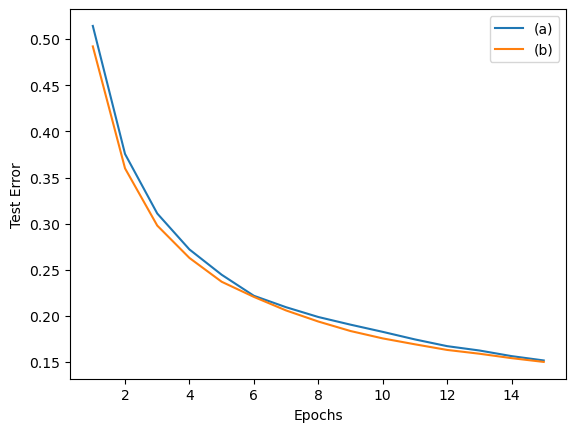

In [6]:
# Plot the learning curve
plt.plot(range(1, num_epochs + 1), test_errors_a, label = '(a)')
plt.plot(range(1, num_epochs + 1), test_errors_b, label = '(b)')
plt.xlabel('Epochs')
plt.ylabel('Test Error')
plt.legend()
plt.show()